## `Handling Univariate Missing Data (Numerical Missing Data)`


- There are two ways to impute *`Numerical Missing Values`*:
    - **`Univariate Imputation`**
        - Here to fill the *`missing values`* of a single column other values of the same column is used.
        - To fill these *`missing values`* we can use any statistical technique like *`mean`*, *`median`*, *`random`* or *`end of distribution`* of the same column.
    - **`Multivariate Imputation`**
        - Here to fill the *`missing values`* of any column values of other columns are used.

- Here we will work with `Univariate Analysis of Numerical Data`. To do this we will use following techniques:
    - `Mean/Median Imputation`
    - `Arbitrary Value Imputation`
    - `End of Distribution Imputation`
    - `Random Sample Imputation`

In [35]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [36]:
# importing datasets

df = pd.read_csv('datasets/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


### `mean/median Imputation`

- To fill up the *`missing values`* we will use the *`mean`* or *`median`* of the column's distribution.
- When the distribution is *`normal`* we can use *`mean`* and if it is a bit *`skewed`* we should use *`median`*.
- **Advantages:**
    - Very easy to implement.
    - It is very simple so can be recreate in the server even after deployment of the model.
    - It is most reliable when the *`missing values <5%`*. 
- **Disadvantages:**
    - It transformed the shape of the distribution.
    - Here there are chances that some data points are taken as *`outliers`* by the model which are actually not *`outliers`*.
    - The *`Covariance/Correlation`* of the column with other columns gets changed.
- **When to use?**
    - When data is *`MCAR`*
    - When the *`missing values <5%`*.

In [38]:
# finding percentage of missing values in each column

df.isna().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

**Notes:**

- So `Age` has about `20%` and `Fare` has about `5%` missing data.

#### Doing train test split

In [39]:
# Creating independent and dependent variables

X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

X.head()

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0


In [40]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [41]:
# Checking percentage of missing values in training data

X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

**Doing `mean/median imputation` using `Pandas`**

In [42]:
# Now creating the mean and median for both the columns

mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [43]:
# Now creating 4 columns and fill them with the mean and the median values

X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

# Now checking the new training dataframe
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
528,39.0,7.9250,0,39.000000,39.00,7.9250,7.9250
284,NaN,26.0000,0,29.785904,28.75,26.0000,26.0000
288,42.0,13.0000,0,42.000000,42.00,13.0000,13.0000
36,NaN,7.2292,0,29.785904,28.75,7.2292,7.2292
475,NaN,52.0000,0,29.785904,28.75,52.0000,52.0000


**Notes**

- Whenever we do this kind of imputation we should look for the changes in the `Variance` for this we use **`var()`**.
- Normally what happens when we impute using `mean/median` the `Variance` got reduced as now most of the values are nearer to the center.

In [44]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print("\n")
print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())

Original Age variable variance:  204.34951339046142
Age Variance after mean imputation:  161.81262452718676
Age Variance after median imputation:  161.98956633460548


Original Fare variable variance:  2448.1979137063163
Fare Variance after mean imputation:  2324.2385256705534
Fare Variance after median imputation:  2340.09102197536


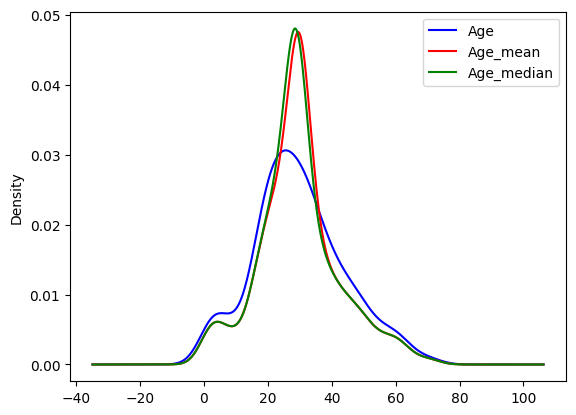

In [45]:
# Visualizing using distribution plots using the 'Age' column

fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable Distribution
X_train['Age'].plot(kind='kde', ax=ax, color="blue")

# Variable imputed with mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color="red")

# Variable imputed with median
X_train['Age_median'].plot(kind='kde', ax=ax, color="green")

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

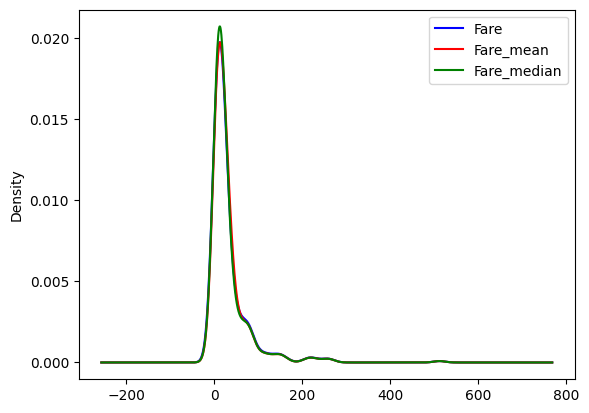

In [13]:
# Visualizing using distribution plots using the 'Fare' column

fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable Distribution
X_train['Fare'].plot(kind='kde', ax=ax, color="blue")

# Variable imputed with mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color="red")

# Variable imputed with median
X_train['Fare_median'].plot(kind='kde', ax=ax, color="green")

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

**Notes:**

- Here in the case of the column `Age` we can see a drastic change in the distribution after the imputation. This is not good.
- But for `Fare` column there is not so much change in the distribution after the imputation. This is a fine situation.
- We also need to check the `Covariance` and `Correlation` there also huge change is not good.

In [14]:
# Checking for covariance

X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


In [15]:
# Checking for correlation

X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
Age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
Age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
Fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
Fare_median,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


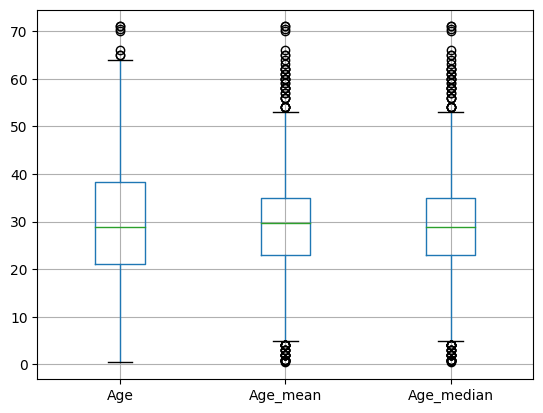

In [17]:
# Checking with boxplots here for the Age column

X_train[['Age', 'Age_mean', 'Age_median']].boxplot()
plt.show()

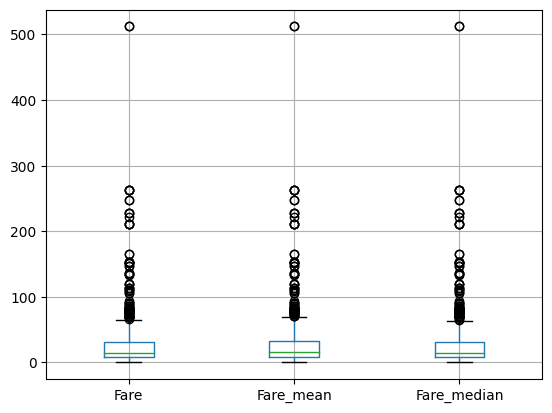

In [16]:
# Checking with boxplots here for the Fare column

X_train[['Fare', 'Fare_mean', 'Fare_median']].boxplot()
plt.show()

**Notes:**
- Here also we can see in the original `Age` column there were minimal outliers that also only on the upper side, but after imputing with `mean` and `median` we can see there are outliers on both side of the column. So there are some normal points now also detected as outliers due to the imputation. This is also not good.
- But for `Fare` there are not much change. So it is good.
- So from all the above we can draw the conclusion that we can use the *`mean/median imputation`* for the column `Fare` in this dataset, but not for the `Age` column.

**Doing the same imputation using `Sklearn`**

- This is recommended, here we use the class `SimpleImputer()` to do the task

In [18]:
# Again doing train test split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [19]:
# Again checking percentage of missing values in training data

X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [20]:
# Now doing the imputation using Sklearn
# Creating objects for mean and median

imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [21]:
# Creating the transformer to impute Age column with mean value and Fare column with median value

trf = ColumnTransformer([
    ("mean_imputer", imputer1, ['Age']),
    ("median_imputer", imputer2, ['Fare'])
    ], remainder='passthrough')

In [22]:
# Now applying on train data

trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer', SimpleImputer(), ['Age']),
                                ('median_imputer',
                                 SimpleImputer(strategy='median'), ['Fare'])])

In [23]:
# Checking the stats

trf.named_transformers_['mean_imputer'].statistics_

array([29.78590426])

In [24]:
trf.named_transformers_['median_imputer'].statistics_

array([14.4583])

In [25]:
# Now transforming both the data

X_train_tf = trf.transform(X_train)
X_trest_tf = trf.transform(X_test)

### `Arbitrary Value Imputation`

- Here we fill all the *`missing values`* with any value of our choice.
- This mainly used mostly with *`Categorical`* values where we can replace `NaN` with the word `Missing`.
- **Advantages**
    - Easy to apply.
- **Disadvantages**
    - The distribution gets changed.
    - The `Covariance/Correlation` also gets changed.
- **When to use?**
    - When we can see that the data is not *`Missing At Random`*

In [46]:
# Again doing train test split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [47]:
# Again checking percentage of missing values in training data

X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [48]:
# Now creating 4 columns and fill them with arbitrary values like 99 and -1

X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_99'] = X_train['Fare'].fillna(99)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

# Now checking the new training dataframe
X_train.sample(5)

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
544,50.0,106.425,1,50.0,50.0,106.425,106.425
145,19.0,36.750,2,19.0,19.0,36.750,36.750
668,43.0,8.050,0,43.0,43.0,8.050,8.050
845,42.0,7.550,0,42.0,42.0,7.550,7.550
278,7.0,29.125,5,7.0,7.0,29.125,29.125


In [49]:
# Checking changes in variance

print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 imputation: ', X_train['Age_minus1'].var())
print("\n")
print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 99 imputation: ', X_train['Fare_99'].var())
print('Fare Variance after -1 imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after 99 imputation:  951.7275570187188
Age Variance after -1 imputation:  318.0896202624488


Original Fare variable variance:  2448.1979137063163
Fare Variance after 99 imputation:  2536.0773428319703
Fare Variance after -1 imputation:  2378.5676784883494


**Notes**
- Here we can see huge changes in variance.

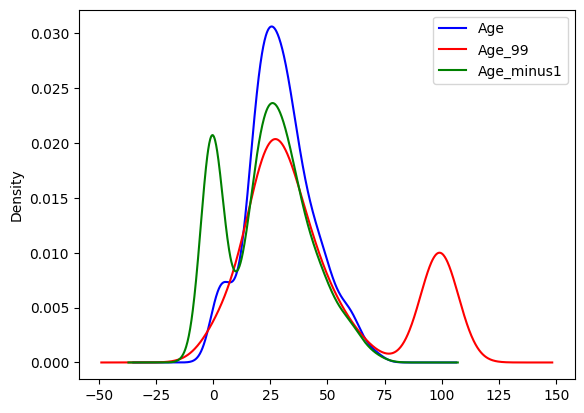

In [50]:
# Checking with column Age

fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable Distribution
X_train['Age'].plot(kind='kde', ax=ax, color="blue")

# Variable imputed with mean
X_train['Age_99'].plot(kind='kde', ax=ax, color="red")

# Variable imputed with median
X_train['Age_minus1'].plot(kind='kde', ax=ax, color="green")

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

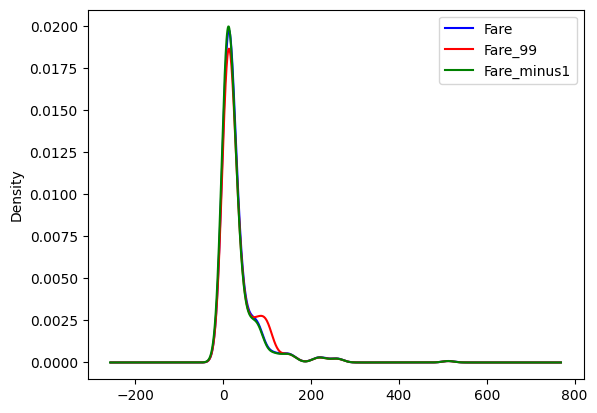

In [51]:
# Checking with column Fare

fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable Distribution
X_train['Fare'].plot(kind='kde', ax=ax, color="blue")

# Variable imputed with mean
X_train['Fare_99'].plot(kind='kde', ax=ax, color="red")

# Variable imputed with median
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color="green")

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [52]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,73.268412,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,16.051452,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-100.878826,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,128.692715,114.394141
Fare_99,73.268412,2448.197914,16.051452,-100.878826,128.692715,2536.077343,2216.958409
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,2216.958409,2378.567678


#### Using `sklearn`

In [60]:
# Again doing train test split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [61]:
# Here the strategy will be 'constant' and we can give any fill_value

imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

In [62]:
trf = ColumnTransformer([
    ("impute_99", imputer1, ['Age']),
    ("impute_999", imputer2, ['Fare'])
    ], remainder='passthrough')

In [63]:
# Training the transformer with the train data

trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute_99',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('impute_999',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [64]:
# Checking the stats

trf.named_transformers_['impute_99'].statistics_

array([99.])

In [65]:
trf.named_transformers_['impute_999'].statistics_

array([999.])

In [66]:
# Now transforming both the data

X_train_tf = trf.transform(X_train)
X_trest_tf = trf.transform(X_test)

### `End of Distribution Imputation`

- It is just an extension of `Arbitrary Value Imputation`.
- As in `Arbitrary Value Imputation` it is difficult to find the best arbitrary value, so here comes the `End of Distribution Imputation`.
- Here we pick the value from the end of the distribution of the column with the *`missing values`*
- If the data distribution is **`normal`** then we use the value:
    - **(mean + 3 $\sigma$)**    or   **(mean - 3 $\sigma$)**
    - Where **$\sigma$** means **Standard Deviation**
- If the data distribution is **`skewed`** then we use the technique of **IQR Proximity Rule**:
    - **Q1 - 1.5*IQR**   or  **Q3 + 1.5*IQR**
    - Where **IQR** is **Q3 - Q1** and **Q1** is `25th percentile` and **Q3** is `75th percentile`
- **Advantages**
    - Easy to apply.
- **Disadvantages**
    - The distribution gets changed.
    - The `Covariance/Correlation` also gets changed.
- **When to use?**
    - When data is `Not Missing At Random`.
- So in `End of Distribution Imputation` we find the value using a technique whereas in `Arbitrary Value Imputation` we select the value arbitrarily. 
- The end goal of both these Imputations is to let the model know that there are **`missing values`** in the dataset.